In [9]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from process import PoissonPointProcess as csr
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt
from distance_statistics import G, g, g_envelopes, f, f_envelopes, j, j_envelopes
from distance_statistics import Genv, Fenv, F

In [10]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [11]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


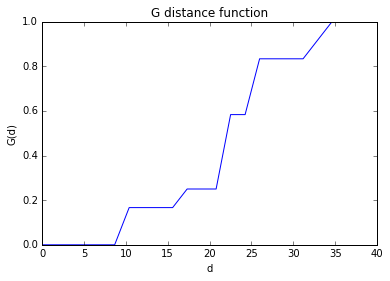

In [12]:
gp1 = G(p1, intervals=20)
gp1.plot()

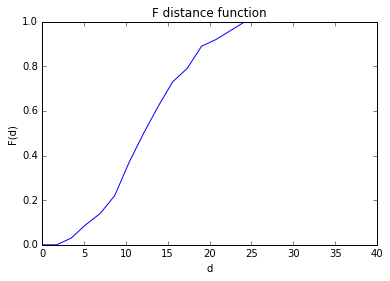

In [13]:
fp1 = F(p1, intervals=20)
fp1.plot()

In [14]:
realizations = csr(p1.window, p1.n, 100, asPP=True)
genv = Genv(p1, intervals=20, realizations=realizations)

In [15]:
genv.observed

array([[  0.        ,   0.        ],
       [  1.73156208,   0.        ],
       [  3.46312417,   0.        ],
       [  5.19468625,   0.        ],
       [  6.92624834,   0.        ],
       [  8.65781042,   0.        ],
       [ 10.3893725 ,   0.16666667],
       [ 12.12093459,   0.16666667],
       [ 13.85249667,   0.16666667],
       [ 15.58405875,   0.16666667],
       [ 17.31562084,   0.25      ],
       [ 19.04718292,   0.25      ],
       [ 20.77874501,   0.25      ],
       [ 22.51030709,   0.58333333],
       [ 24.24186917,   0.58333333],
       [ 25.97343126,   0.83333333],
       [ 27.70499334,   0.83333333],
       [ 29.43655542,   0.83333333],
       [ 31.16811751,   0.83333333],
       [ 32.89967959,   0.91666667],
       [ 34.63124168,   1.        ],
       [ 36.36280376,   1.        ]])

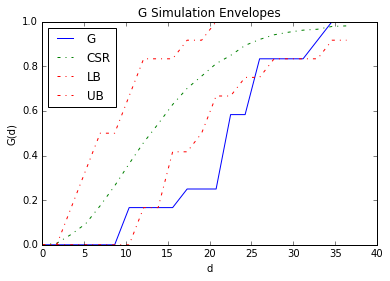

In [16]:
genv.plot()

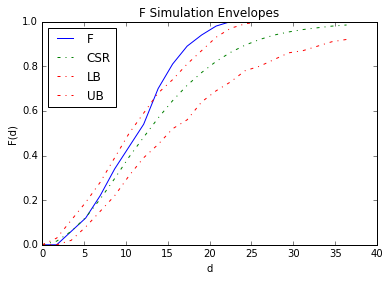

In [17]:
fenv = Fenv(p1, intervals=20, realizations=realizations)
fenv.plot()

In [21]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [23]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [24]:
vpp = PointPattern(vapnts)

In [25]:
fvpp = F(vpp)

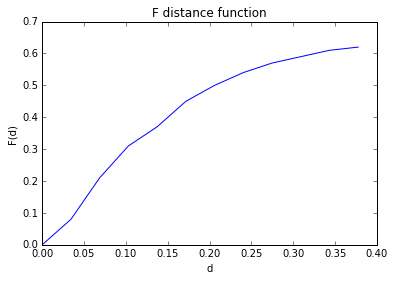

In [28]:
fvpp.plot()

In [29]:
realizations = csr(vpp.window, vpp.n, 100, asPP=True)
fenvvpp = Fenv(vpp, realizations=realizations)

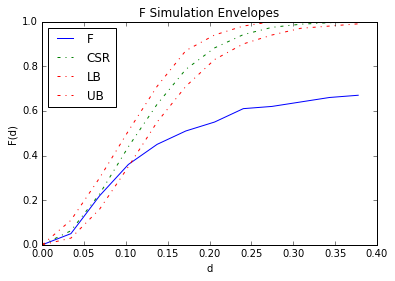

In [30]:
fenvvpp.plot()

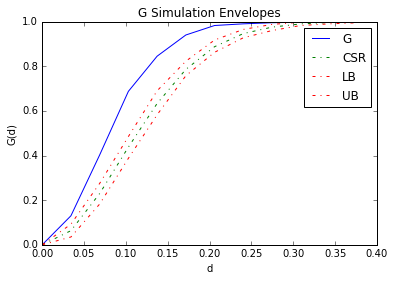

In [31]:
genvvpp = Genv(vpp, realizations=realizations)
genvvpp.plot()

In [33]:
state = as_window(state)

In [34]:
vppw = PointPattern(vapnts, window=state)

In [35]:
wrealizations = csr(vppw.window, vpp.n, 100, asPP=True)

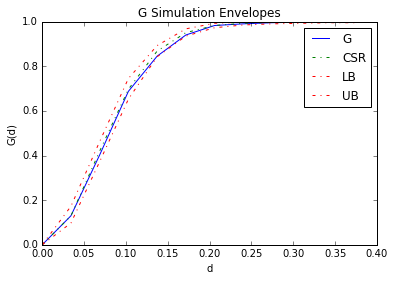

In [36]:
genvvppw = Genv(vppw, realizations=wrealizations)
genvvppw.plot()

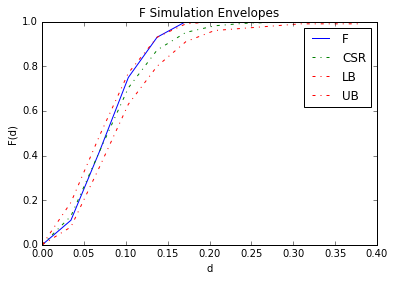

In [37]:
fenvvppw = Fenv(vppw, realizations=wrealizations)
fenvvppw.plot()

In [19]:
fenv = Fenv(p1, intervals=20, realizations=realizations)

In [20]:
fenv.obs

AttributeError: 'Fenv' object has no attribute 'obs'

In [ ]:
fp1 = f(p1, intervals=20)
plt.plot(fp1[:,0], fp1[:,1])
plt.title("Empty Space F function")
plt.ylabel("F(d)")
plt.xlabel("d")

In [ ]:
jp1 = j(p1, intervals=20)
plt.plot(jp1[:,0], jp1[:,1])
plt.title("J function")
plt.ylabel("J(d)")
plt.xlabel("d")
plt.plot(jp1[:,0], jp1[:,1])

In [ ]:
sim = g_envelopes(p1, intervals=20, reps=100)
gs, x, fobs, mean, low, high = sim
plt.plot(x, fobs, label='G')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("G(d)")
plt.xlabel('d')
plt.title('G Simulation Envelopes')
plt.legend(loc=0)

In [ ]:
sim = f_envelopes(p1, intervals=20, reps=100)
fs, x, fobs, mean, low, high = sim
plt.plot(x, fobs, label='F')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("F(d)")
plt.xlabel('d')
plt.title('F Simulation Envelopes')
plt.legend(loc=0)

In [ ]:
sim = j_envelopes(p1, intervals=20, reps=100)
js, x, jobs, mean, low, high = sim
plt.plot(x, jobs, label='J')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("J(d)")
plt.xlabel('d')
plt.title('J Simulation Envelopes')
plt.legend(loc=0)

In [ ]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [ ]:
vpp = PointPattern(vapnts)

In [ ]:
gvpp = g(vpp)

In [ ]:
gvpp

In [ ]:
gevpp = g_envelopes(vpp)

In [ ]:
gs, x, gobs, mean, low, high = gevpp
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [ ]:
vppw = PointPattern(vapnts, window = as_window(state))

In [ ]:
gevppw = g_envelopes(vppw)

In [ ]:
gs, x, gobs, mean, low, high = gevppw
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [ ]:
gevppw = g_envelopes(vppw, reps=50)

In [ ]:
gs, x, gobs, mean, low, high = gevppw
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')